# Project 1: Write a Data Science Blog Post

For this project, Chilean elections datasets were used to answer some questions regarding the preferences and behavior of voters, in light of the latest election on Sunday 21, November. This data was assessed, cleaned and analyzed to generate some visualizations, which will be later used for a blog post on Medium.

### Table of contents
- <a href="#loading">Loading the datasets</a>
- <a href="#cleaning">Cleaning the data</a>
- <a href="#analyzing">Analyzing the data</a>
    - <a href="participation">Participation during first and second rounds</a>
    - <a href="blanknull">Blank and null votes during first rounds</a>
    - <a href="gender">Votes for Presidental Winner by gender</a>
    - <a href="previous">Votes for current runners in previous elections</a>

In [323]:
## initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id="loading"></a>
## Loading the datasets
All data was obtained from the SERVEL website: 
- Historic dataset for elections from 1989 to 2017, directly from the website
- Data for 2021 elections was gathered from the latest election website available, and consolidated in its own file
- Data for electoral rolls was gathered from different rolls for all years (for second rounds, the same roll was assumed)

In [407]:
## loading both datasets
df_historic = pd.read_excel("resultados_elecciones_presidenciales_ce_1989_2017_Chile.xlsx")
df_2021 = pd.read_excel("ELECCIONES 2021.xlsx")

In [411]:
## appending the 2021 results to the historic dataset
df_original = df_historic.append(df_2021)
df = df_original.copy()

<a id="cleaning"></a>
## Assesing and cleaning the data

These steps where moved together after preparing the data, but respond to issues faced while coding and assessing. The main issue was the column names, as they're written in a friendly format for Excel, but not so much for pandas. We also found a lot of duplicate results when aggregating the data, which was caused by some strings being written in a slightly different way, or extra whitespace that needed to be removed. In this case, we had a lot of data concerning towns and cities for all years except 2021, so using national data was opted, but more detailed results would need an updated dataset which includes the latest election, but this is just a first look so a national overview is good too.

In [412]:
## replacing uppercase characters, punctuation, spaces for easier to use columns names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace("ó", "o").str.replace("í", "i").str.strip()

<ipython-input-412-f668a50935d7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace("ó", "o").str.replace("í", "i").str.strip()


In [413]:
## check new names
df.columns

Index(['tipo_de_eleccion', 'cargo', 'fecha_de_eleccion', 'año_de_eleccion',
       'inicio_de_periodo', 'fin_de_periodo', 'periodo',
       'votacion_presidencial', 'id_region', 'region', 'provincia',
       'nombre_provincia', 'comuna', 'circunscripcion_electoral', 'sexo_mesa',
       'candidato_a', 'nombres', 'apellido_paterno', 'apellido_materno',
       'sexo', 'electoa', 'partido', 'sigla_partido', 'votos_totales'],
      dtype='object')

In [414]:
## remove extra whitespace in string columns to avoid unnecessary duplicates when aggregating results
for column in df.select_dtypes(include="object").columns:
    df[column] = df[column].str.strip()

In [415]:
## replace name of region to match other rows
df["region"] = df["region"].str.replace("DEL LIBERTADOR BDO. OHIGGINS", "DEL LIBERTADOR BDO. O'HIGGINS")

<ipython-input-415-12b93957e503>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["region"] = df["region"].str.replace("DEL LIBERTADOR BDO. OHIGGINS", "DEL LIBERTADOR BDO. O'HIGGINS")


In [432]:
## replace candidate name to match other rows
df["candidato_a"] = df["candidato_a"].str.replace('MARCO ENRIQUEZ-OMINAMI GUMUCIO', 'MARCO ENRIQUEZ-OMINAMI')
df["candidato_a"] = df["candidato_a"].str.replace('MARCO  ENRIQUEZ-OMINAMI GUMUCIO', 'MARCO ENRIQUEZ-OMINAMI')
df["candidato_a"] = df["candidato_a"].str.replace('FRANCO ALDO PARISI FERNANDEZ', "FRANCO PARISI FERNANDEZ")

<a id="analyzing"></a>
## Analyzing the data

The questions posed below stem from fresh curiosity after this weekend's elections, which drive the need for some insight based on previous national elections, and wanting to know how participation varies between rounds, the proportion of people who vote either blank or null on a first or unique round of elections, getting to know how men and women vote when it comes to the winner for previous elections, and to see the magnitude of new voters for candidates who were running after previous attempts. 

<a id="participation"></a>
### Participation during first and second rounds

In [593]:
## yearly electoral rolls data for total elegible voters

electoral_rolls = {"1989-12-14": 7557537,
                  "1993-12-11": 8085439,
                  "1999-12-12": 8084476,
                  "2000-01-16": 8084476,
                  "2005-12-11": 8220897,
                  "2006-01-15": 8220897,
                  "2009-12-13": 8285186,
                  "2010-01-17": 8285186,
                  "2013-11-17": 13573143,
                  "2013-12-15": 13573143,
                  "2017-11-19": 14308151,
                  "2017-12-17": 14308151,
                  "2021-11-21": 14959956}

In [594]:
## creating lists of date labels for each rounds

yearly_electoral_rolls = list(electoral_roll.values())

firstround_indices = [2,4,6,8,10,12]
secondround_indices = [3,5,7,9,11]
firstround_rolls = [yearly_electoral_rolls[x] for x in firstround_indices]
secondround_rolls = [yearly_electoral_rolls[x] for x in secondround_indices]

In [595]:
## obtaining first round total votes and percentage for each election
firstround_total_votes = df.query("votacion_presidencial == ['PRIMERA VOTACIÓN']").groupby(by=["fecha_de_eleccion"])["votos_totales"].sum()
pctg_firstround_votes = firstround_total_votes / firstround_rolls * 100
pctg_firstround_votes

fecha_de_eleccion
1999-12-12    89.944877
2005-12-11    87.670214
2009-12-13    87.676197
2013-11-17    49.354899
2017-11-19    46.686822
2021-11-21    47.336730
Name: votos_totales, dtype: float64

In [596]:
## obtaining second round total votes and percentage for each election
secondround_total_votes = df.query("votacion_presidencial == ['SEGUNDA VOTACIÓN']").groupby(by=["fecha_de_eleccion"])["votos_totales"].sum()
pctg_secondround_votes = secondround_total_votes / secondround_rolls * 100
pctg_secondround_votes

fecha_de_eleccion
2000-01-16    90.627432
2006-01-15    87.123644
2010-01-17    86.942780
2013-12-15    41.978125
2017-12-17    49.003942
Name: votos_totales, dtype: float64

In [597]:
## adding a row for 2021 second round to plot all years
secondround_2021 = pd.Series([0], index=[2021])
pctg_secondround_votes = pctg_secondround_votes.append(secondround_2021)
pctg_secondround_votes

2000-01-16 00:00:00    90.627432
2006-01-15 00:00:00    87.123644
2010-01-17 00:00:00    86.942780
2013-12-15 00:00:00    41.978125
2017-12-17 00:00:00    49.003942
2021                    0.000000
dtype: float64

In [598]:
## general parameters for plotting
rounds_years_labels = list(df.query("votacion_presidencial == ['PRIMERA VOTACIÓN']").año_de_eleccion.unique().astype("str"))
ind = np.arange(len(pctg_firstround_votes))
ticks = np.arange(len(rounds_years_labels))
width = 0.3

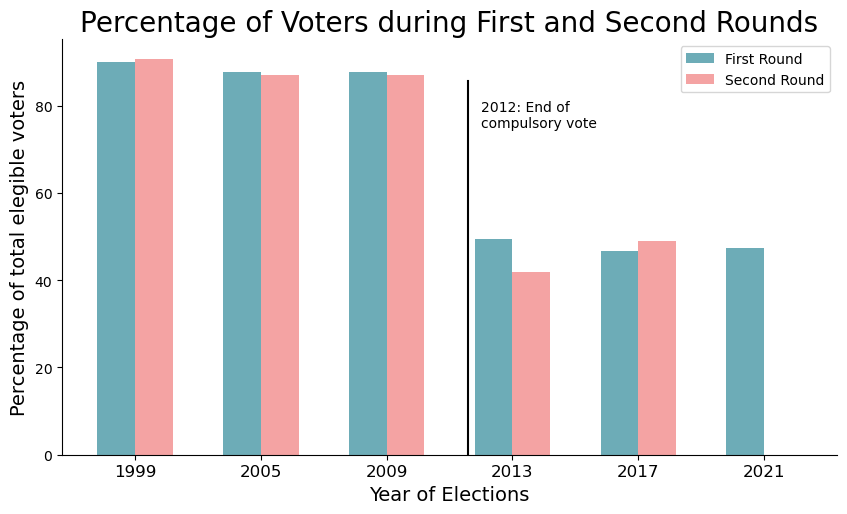

In [599]:
## plotting the results
plt.figure(figsize=(10,5.5), dpi=100)
plt.bar(ind, pctg_firstround_votes, width, label = "First Round", color=(0.33, 0.62, 0.67, 0.85))
plt.bar(ind + width, pctg_secondround_votes, width, label = "Second Round", color=(0.93, 0.4, 0.4, 0.6))
legends = ["First Round", "Second Round"]

plt.ylabel('Percentage of total elegible voters', fontsize=14)
plt.xlabel('Year of Elections', fontsize=14)
plt.title('Percentage of Voters during First and Second Rounds', fontsize=20)
locations = ticks + 0.15
labels = rounds_years_labels
plt.xticks(locations, labels, fontsize=12)
plt.yticks()
plt.legend(legends, fontsize=10)
plt.axvline(x=2.8, ymax = 0.9, color="black")
plt.text(2.9,75,'2012: End of \ncompulsory vote',rotation=0)
sns.despine();

<a id="blanknull"></a>
### Blank and null votes during first rounds

In [583]:
## getting total votes for first or unique rounds of elections
total_votes_firstround = df.query("votacion_presidencial == ['PRIMERA VOTACIÓN', 'UNICA VOTACIÓN']").groupby(by=["fecha_de_eleccion"])["votos_totales"].sum()
total_votes_firstround

fecha_de_eleccion
1989-12-14    7158727
1993-12-11    7383286
1999-12-12    7271572
2005-12-11    7207278
2009-12-13    7264136
2013-11-17    6699011
2017-11-19    6680021
2021-11-21    7081554
Name: votos_totales, dtype: int64

In [584]:
## getting the total and percentage of null votes
null_votes = df.query("(sexo != sexo) and (candidato_a == 'VOTOS NULOS') and (votacion_presidencial == ['PRIMERA VOTACIÓN', 'UNICA VOTACIÓN'])").groupby(by=["fecha_de_eleccion", "candidato_a"])["votos_totales"].sum()
pctg_null_votes = (null_votes / total_votes_firstround) * 100
pctg_null_votes

fecha_de_eleccion  candidato_a
1989-12-14         VOTOS NULOS    1.447618
1993-12-11         VOTOS NULOS    3.675721
1999-12-12         VOTOS NULOS    2.192992
2005-12-11         VOTOS NULOS    2.504205
2009-12-13         VOTOS NULOS    2.759034
2013-11-17         VOTOS NULOS    0.999177
2017-11-19         VOTOS NULOS    0.963216
2021-11-21         VOTOS NULOS    0.805416
Name: votos_totales, dtype: float64

In [585]:
## getting the total and percentage of blank votes
blank_votes = df.query("(sexo != sexo) and (candidato_a == 'VOTOS EN BLANCO') and (votacion_presidencial == ['PRIMERA VOTACIÓN', 'UNICA VOTACIÓN'])").groupby(by=["fecha_de_eleccion", "candidato_a"])["votos_totales"].sum()
pctg_blank_votes = (blank_votes / total_votes) * 100
pctg_blank_votes

fecha_de_eleccion  candidato_a    
1989-12-14         VOTOS EN BLANCO         NaN
1993-12-11         VOTOS EN BLANCO         NaN
1999-12-12         VOTOS EN BLANCO    0.783751
2005-12-11         VOTOS EN BLANCO    1.175922
2009-12-13         VOTOS EN BLANCO    1.186266
2013-11-17         VOTOS EN BLANCO    0.690669
2017-11-19         VOTOS EN BLANCO    0.575762
2021-11-21         VOTOS EN BLANCO    0.441372
Name: votos_totales, dtype: float64

In [590]:
## general parameters for plotting
years_labels = list(df.query("votacion_presidencial == ['PRIMERA VOTACIÓN', 'UNICA VOTACIÓN']").año_de_eleccion.unique().astype("str"))

ind = np.arange(len(pctg_null_votes))
ticks = np.arange(len(years_labels))
width = 0.3

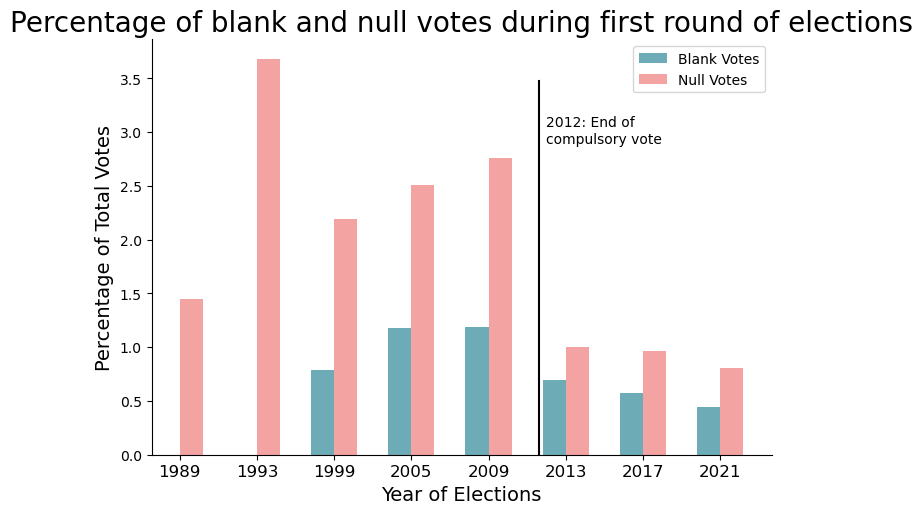

In [592]:
## plotting
plt.figure(figsize=(8,5.5), dpi=100)
plt.bar(ind, pctg_blank_votes, width, label = "Blank Votes", color=(0.33, 0.62, 0.67, 0.85))
plt.bar(ind + width, pctg_null_votes, width, label = "Null Votes", color=(0.93, 0.4, 0.4, 0.6))
legends = ["Blank Votes", "Null Votes"]

plt.ylabel('Percentage of Total Votes', fontsize=14)
plt.xlabel('Year of Elections', fontsize=14)
plt.title('Percentage of blank and null votes during first round of elections', fontsize=20)
locations = ticks + 0.15
labels = years_labels
plt.xticks(locations, labels, fontsize=12)
plt.yticks()
plt.legend(legends, fontsize=10)
plt.axvline(x=4.8, ymax = 0.9, color="black")
plt.text(4.9,2.9,'2012: End of \ncompulsory vote',rotation=0) ## adding line to mark end of compulsory vote
sns.despine();

<a id="gender"></a>
## Votes for Presidental Winner by gender

In [579]:
## total men votes for presidential winner each year
winner_men_votes = df.query("electoa == 'SI' and sexo_mesa == 'HOMBRE'").groupby(by=["año_de_eleccion"])["votos_totales"].sum()
winner_men_votes

año_de_eleccion
1989    1976409
1993    2100504
2000    1843833
2006    1976269
2010    1663508
Name: votos_totales, dtype: int64

In [580]:
## total women votes for presidential winner each year
winner_women_votes = df.query("electoa == 'SI' and sexo_mesa == 'MUJER'").groupby(by=["año_de_eleccion"])["votos_totales"].sum()
winner_women_votes

año_de_eleccion
1989    1874162
1993    1943608
2000    1839325
2006    1746750
2010    1927674
Name: votos_totales, dtype: int64

In [581]:
## general parameters for plotting

years_labels = list(df.query("electoa == 'SI' and sexo_mesa != 'MIXTA'").año_de_eleccion.unique().astype("str"))

ind = np.arange(len(winner_women_votes))
ticks = np.arange(len(years_labels))
width = 0.3

<ipython-input-582-c972fd274405>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in values])  ## formating y axis labels


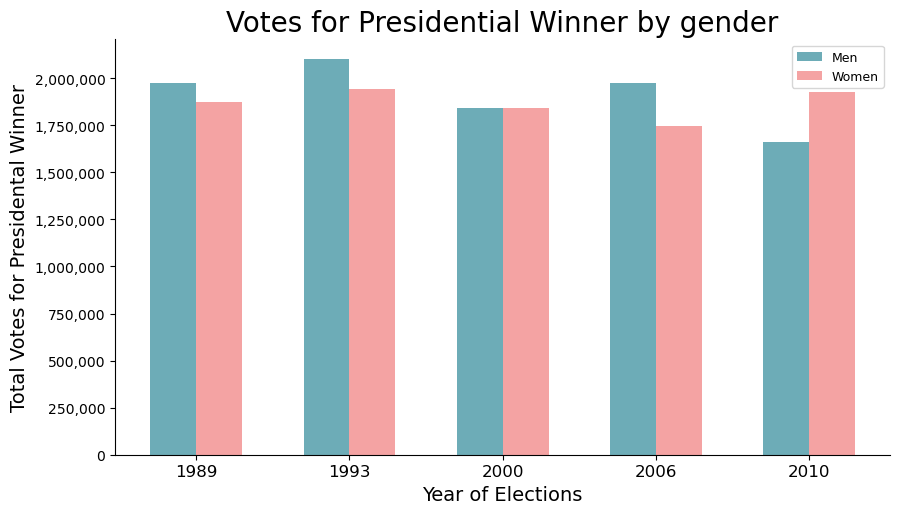

In [582]:
## plotting

plt.figure(figsize=(10,5.5), dpi=100)
plt.bar(ind, winner_men_votes, width, label = "Men", color=(0.33, 0.62, 0.67, 0.85))
plt.bar(ind + width, winner_women_votes, width, label = "Women", color=(0.93, 0.4, 0.4, 0.6))
legends = ["Men", "Women"]

plt.ylabel('Total Votes for Presidental Winner', fontsize=14)
plt.xlabel('Year of Elections', fontsize=14)
plt.title('Votes for Presidential Winner by gender', fontsize=20)
locations = ticks + 0.15
labels = years_labels
plt.xticks(locations, labels, fontsize=12)
plt.yticks()
plt.legend(legends, fontsize=9)

values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in values])  ## formating y axis labels

sns.despine();

<a id="previous"></a>
## Votes for current runners in previous elections

In [428]:
## list of current runners
current_runners = df.query("año_de_eleccion == 2021 and candidato_a not in ['VOTOS NULOS', 'VOTOS EN BLANCO']").candidato_a.unique()
current_runners

array(['GABRIEL BORIC FONT', 'JOSE ANTONIO KAST RIST',
       'YASNA PROVOSTE CAMPILLAY', 'SEBASTIAN SICHEL RAMIREZ',
       'EDUARDO ARTES BRICHETTI', 'MARCO ENRIQUEZ-OMINAMI',
       'FRANCO PARISI FERNANDEZ'], dtype=object)

In [433]:
## identify all previous runners before 2021
all_previous_runners = df.query("año_de_eleccion != 2021").candidato_a.unique()
all_previous_runners

array(['FRANCISCO JAVIER ERRAZURIZ', 'HERNAN BUCHI', 'PATRICIO AYLWIN',
       'VOTOS NULOS', 'VOTOS EN BLANCO', 'ARTURO ALESSANDRI',
       'CRISTIAN REITZE', 'EDUARDO FREI', 'EUGENIO PIZARRO',
       'JOSE PIÑERA', 'MANFRED MAX', 'ARTURO FREI', 'GLADYS MARIN',
       'JOAQUIN LAVIN', 'RICARDO LAGOS', 'SARA LARRAIN', 'TOMAS HIRSCH',
       'MICHELLE BACHELET', 'SEBASTIAN PIÑERA', 'JORGE ARRATE',
       'MARCO ENRIQUEZ-OMINAMI', 'ALFREDO SFEIR YOUNIS',
       'EVELYN MATTHEI FORNET', 'FRANCO PARISI FERNANDEZ',
       'MARCEL CLAUDE REYES', 'MICHELLE BACHELET JERIA',
       'RICARDO ISRAEL ZIPPER', 'ROXANA MIRANDA MENESES',
       'TOMAS JOCELYN-HOLT LETELIER', 'ALEJANDRO  GUILLIER ALVAREZ',
       'ALEJANDRO NAVARRO BRAIN', 'BEATRIZ SANCHEZ MUÑOZ',
       'CAROLINA GOIC BOROEVIC', 'EDUARDO ARTES BRICHETTI',
       'JOSE ANTONIO KAST RIST', 'SEBASTIAN PIÑERA ECHENIQUE'],
      dtype=object)

In [476]:
## list of current runners who have ran before 2021
all_previous_runners = df.query("año_de_eleccion != 2021").candidato_a.unique()

previous_runners_2021 = []

for runner in current_runners:
    if runner in all_previous_runners:
        previous_runners_2021.append(runner)
        
previous_runners_2021

['JOSE ANTONIO KAST RIST',
 'EDUARDO ARTES BRICHETTI',
 'MARCO ENRIQUEZ-OMINAMI',
 'FRANCO PARISI FERNANDEZ']

In [554]:
## votes for each candidate and correction of series for later plotting
kast_votes = df.query("candidato_a == 'JOSE ANTONIO KAST RIST'").groupby(by="año_de_eleccion")["votos_totales"].sum()
kast_votes = kast_votes.append(pd.Series([0, 0], index=[2009, 2013])).sort_index()
kast_votes

2009          0
2013          0
2017     522145
2021    1953950
dtype: int64

In [555]:
artes_votes = df.query("candidato_a == 'EDUARDO ARTES BRICHETTI'").groupby(by="año_de_eleccion")["votos_totales"].sum()
artes_votes = artes_votes.append(pd.Series([0, 0], index=[2009, 2013])).sort_index()
artes_votes

2009         0
2013         0
2017     33443
2021    102493
dtype: int64

In [556]:
meo_votes = df.query("candidato_a == 'MARCO ENRIQUEZ-OMINAMI'").groupby(by="año_de_eleccion")["votos_totales"].sum()
meo_votes

año_de_eleccion
2009    1405124
2013     723542
2017     376162
2021     533656
Name: votos_totales, dtype: int64

In [557]:
parisi_votes = df.query("candidato_a == 'FRANCO PARISI FERNANDEZ'").groupby(by="año_de_eleccion")["votos_totales"].sum()
parisi_votes = parisi_votes.append(pd.Series([0, 0], index=[2009, 2017])).sort_index()
parisi_votes

2009         0
2013    666015
2017         0
2021    898406
dtype: int64

In [560]:
## general parameters for plotting

years_labels = df.query("candidato_a == 'MARCO ENRIQUEZ-OMINAMI'").año_de_eleccion.unique()

ind = np.arange(len(previous_runners_2021))
ticks = np.arange(len(years_labels))
width = 0.2
candidate_labels

['Kast', 'Artés', 'ME-O', 'Parisi']

<ipython-input-578-3ce2d27255b1>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in values])  ## formating y axis labels


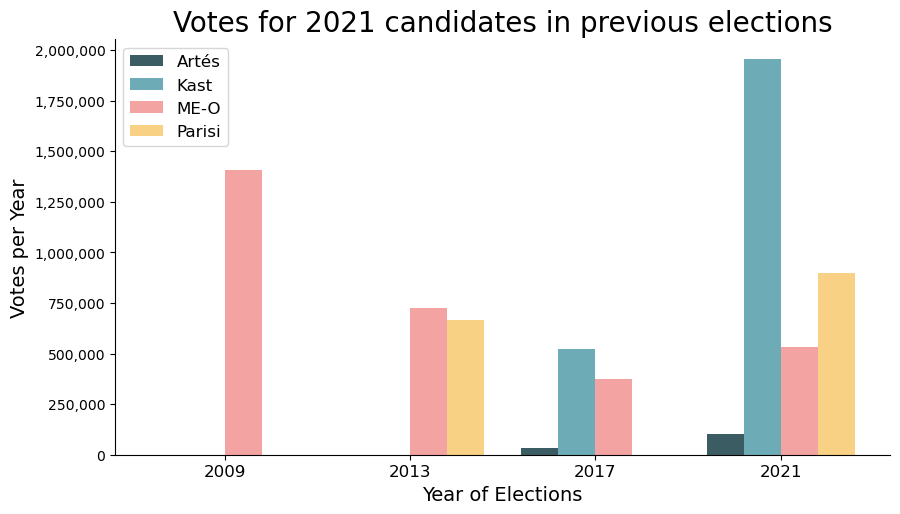

In [578]:
## plotting

plt.figure(figsize=(10,5.5), dpi=100)
plt.bar(ind + width, artes_votes, width, label = "Artés", color=(0.15, 0.29, 0.32, 0.9))
plt.bar(ind + width*2, kast_votes, width, label = "Kast", color=(0.33, 0.62, 0.67, 0.85))
plt.bar(ind + width*3, meo_votes, width, label = "ME-O", color=(0.93, 0.4, 0.4, 0.6))
plt.bar(ind + width*4, parisi_votes, width, label = "Parisi", color=(0.96, 0.7, 0.2, 0.6))
legends = ["Artés", "Kast", "ME-O", "Parisi"]

plt.ylabel('Votes per Year', fontsize=14)
plt.xlabel('Year of Elections', fontsize=14)
plt.title('Votes for 2021 candidates in previous elections', fontsize=20)
locations = ticks + 0.5
labels = years_labels
plt.xticks(locations, labels, fontsize=12)
plt.yticks()
plt.legend(legends, fontsize=12)

values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in values])  ## formating y axis labels

sns.despine();